Copyright 2019 Carsten Blank

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%aimport lib_experimental_utils

In [ ]:
# Uncomment if you have not set up the PYTHONPATH to point to the code!
# import sys
# import os
# sys.path.append("{}/../lib_paper".format(os.getcwd()))

In [5]:
import qiskit
from qiskit.providers.aer.noise.device import basic_device_noise_model
from lib_experimental_utils import FinishedExperiment, RunningExperiment, qasm_simulator, save, get_gate_times

## Loaded from scheduled job
Jobs
 * 5c9a95f0ce0453006027b4bc (no corrections)
 * 5c9b83cef39a21005de59b08 (cu1 -pi/4 and rx -pi/4)
 
Latest:
    * 5d0c7ee07302860078d944bc (ibmqx2)
    * 5d0c7ee0361a280070fa04fc (ibmqx4)

In [6]:
experiment = FinishedExperiment.from_data(job_id='5c9a95f0ce0453006027b4bc', backend='ibmqx4')

In [8]:
backend = qiskit.IBMQ.get_backend(experiment.backend_name)
device_properties = backend.properties()
gate_times = get_gate_times(backend)
noise_model = basic_device_noise_model(device_properties, gate_times=gate_times, temperature=0) 

In [9]:
simulation = RunningExperiment(date=experiment.date, 
                               qobj=experiment.qobj, 
                               job=qasm_simulator.run(qobj=experiment.qobj, noise_model=noise_model),
                               external_id='{}'.format(experiment.date),
                               noise_model=noise_model)
simulation = FinishedExperiment.from_running_experiment(simulation)

(-0.5, 0.5)

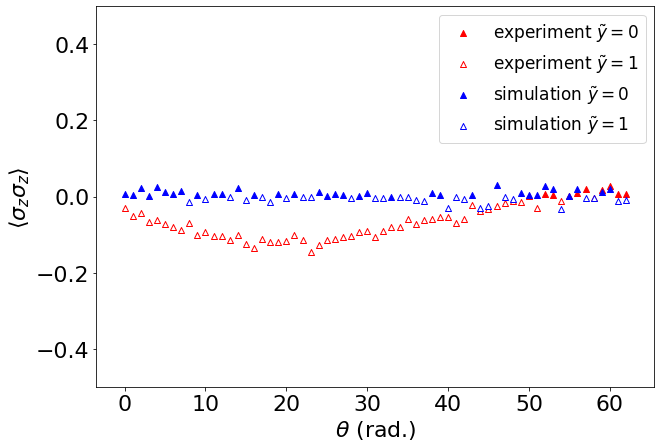

In [10]:
import matplotlib.pyplot as plt
experiment.show_plot(classification_label='experiment', compare_classification=simulation.get_classification(), compare_classification_label='simulation')
plt.ylim((-.5, .5))

In [11]:
save('../../experiment_results', experiment=experiment, simulation=simulation)
